In [23]:
import sys
sys.path.append('..')

In [24]:
from src.data.load_data import get_hackernews_files, load_hackernews_dataframe

In [25]:
files = get_hackernews_files()

In [26]:
path = [x for x in files if x.endswith('HN_2017-01')][0]

In [27]:
df = load_hackernews_dataframe(path)
df.head()

by  dead  deleted  descendants        id                  kids  \
0           jfc   NaN      NaN          NaN  13293889                   NaN   
1   greglindahl   NaN      NaN          NaN  13293890                   NaN   
2         imron   NaN      NaN          NaN  13293891                   NaN   
3       zzzcpan   NaN      NaN          NaN  13293892            [13293927]   
4  theWatcher37   NaN      NaN          NaN  13293893  [13293974, 13295659]   

       parent parts  poll  retrieved_on  score  \
0  13291930.0   NaN   NaN    1500612003    NaN   
1  13292161.0   NaN   NaN    1500612003    NaN   
2  13293408.0   NaN   NaN    1500612003    NaN   
3  13293875.0   NaN   NaN    1500612002    NaN   
4  13293826.0   NaN   NaN    1500612002    NaN   

                                                text        time title  \
0  An extraordinary artist. I&#x27;m glad he was ...  1483228806   NaN   
1  And for those who are wondering what I meant, ...  1483228834   NaN   
2  Perhaps they&#x27;re trying to learn from the ...  1483228850   NaN   
3  Russians are the most likely users of the Ukra...  1483228857   NaN   
4  Crowd funding makes sense however when there i...  1483228879   NaN   

      type  url  
0  comment  NaN  
1  comment  NaN  
2  comment  NaN  
3  comment  NaN  
4  comment  NaN

In [28]:
df.count()

by              235752
dead             11727
deleted           7055
descendants      25513
id              242807
kids            103821
parent          208530
parts                5
poll                53
retrieved_on    242807
score            33023
text            204548
time            242807
title            32970
type            242807
url              30994
dtype: int64

In [29]:
comments = df[df['type'] == 'comment']

In [30]:
from src.filters import use_n_most_occuring_users
user_df = use_n_most_occuring_users(comments, 500)

In [31]:
from src.graphbuilder import GraphBuilder
gb = GraphBuilder()

In [32]:
gb.extend_graph(user_df)
story_graph = gb.graph

52475it [00:38, 1375.73it/s]


In [33]:
story_graph.ecount()



13095

In [34]:
from igraph import plot
layout = story_graph.layout('kk')
plot(story_graph, layout=layout)

In [36]:
cluster = story_graph.community_multilevel()

In [37]:
plot(cluster, mark_groups=True)

In [21]:
story_graph.ecount()

13095

In [38]:
# https://stackoverflow.com/questions/25254151/using-igraph-in-python-for-community-detection-and-writing-community-number-for
dendogram = story_graph.community_edge_betweenness()


In [39]:
dendogram.optimal_count

364

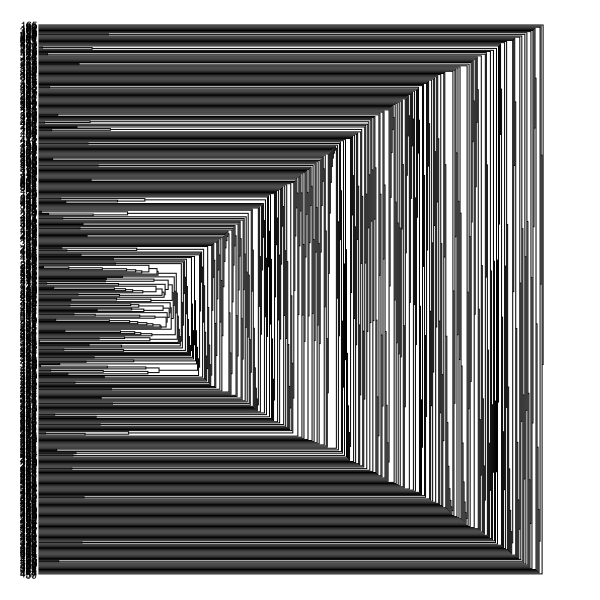

In [42]:
plot(dendogram)